C:\Users\adabs\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


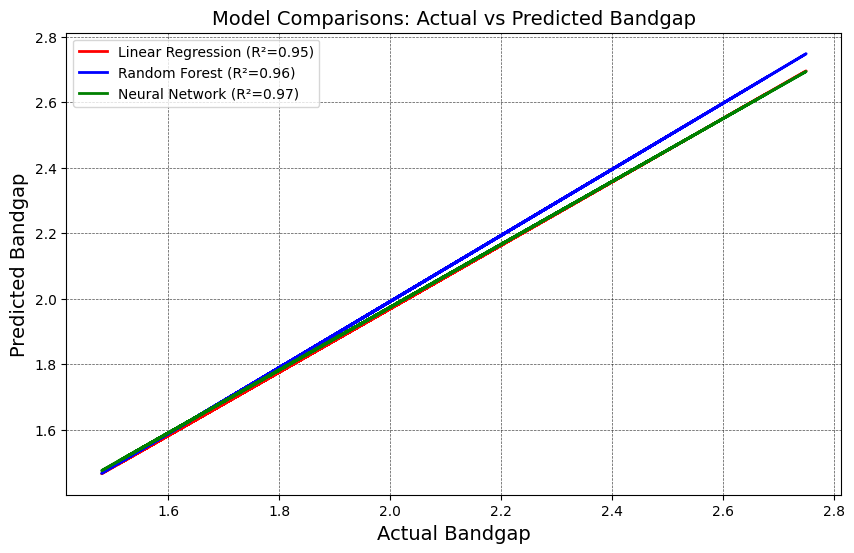

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np


file_path = 'pb_data.csv'
data = pd.read_csv(file_path)
data = data.drop('ID', axis=1)

X = data.drop('Bandgap', axis=1)
y = data['Bandgap']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_predictions = lr_model.predict(X_test)
lr_r2 = r2_score(y_test, lr_predictions)


lr_slope, lr_intercept = np.polyfit(y_test, lr_predictions, 1)


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)
rf_r2 = r2_score(y_test, rf_predictions)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

nn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

nn_model.fit(X_train_scaled, y_train, epochs=150, batch_size=8, validation_split=0.2, verbose=0)

nn_predictions = nn_model.predict(X_test_scaled).flatten()
nn_r2 = r2_score(y_test, nn_predictions)


plt.figure(figsize=(10, 6))


lr_fit = np.poly1d(np.polyfit(y_test, lr_predictions, 1))
plt.plot(y_test, lr_fit(y_test), color='red', label=f'Linear Regression (R²={lr_r2:.2f})', linewidth=2)

rf_fit = np.poly1d(np.polyfit(y_test, rf_predictions, 1))
plt.plot(y_test, rf_fit(y_test), color='blue', label=f'Random Forest (R²={rf_r2:.2f})', linewidth=2)


nn_fit = np.poly1d(np.polyfit(y_test, nn_predictions, 1))
plt.plot(y_test, nn_fit(y_test), color='green', label=f'Neural Network (R²={nn_r2:.2f})', linewidth=2)

plt.xlabel('Actual Bandgap', fontsize =14)
plt.ylabel('Predicted Bandgap', fontsize =14)
plt.title('Model Comparisons: Actual vs Predicted Bandgap', fontsize =14)
plt.legend()
plt.grid(color='black', linestyle='--', linewidth=0.5, alpha=0.7)


plt.savefig('model_comparisons.tiff', format='tiff', dpi=300)
plt.show()
